In [1]:
from matplotlib import font_manager
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

1. 添加子图：fig.add_axes([位置])
2. 常规 ticks 设置
3. 边框
4. major\minor刻度
5. grid
6. ax.text 在网格点添加文字

In [11]:
def heatmap(a, title):
    a = a.reshape(20, 12)
    a = np.transpose(a)
    fig = plt.figure(figsize=(24, 12), dpi=300)
    
    ax = fig.add_axes([0.1, 0.8, 0.5, 0.3])

    im = ax.imshow(a, cmap="RdBu", vmin=0, vmax=240)
    #cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])
    #cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

    x_ticks = np.arange(1981, 2001, 1)
    #x_ticks = np.arange(2001, 2021, 1)
    y_ticks = np.arange(1, 13, 1)

    ax.set_xticks(np.arange(a.shape[1]))
    ax.set_yticks(np.arange(a.shape[0]))
    ax.set_xticklabels(x_ticks)
    ax.set_yticklabels(y_ticks)
    ax.set_xlabel("years", fontsize=10)
    ax.set_ylabel("months", fontsize=10)
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True, labelsize=5)

    for edge, spine in ax.spines.items():  # 边框
        spine.set_visible(False)

    # plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
        # rotation_mode="anchor") #坐标旋转

    '''major minor 刻度'''
    ax.set_xticks(np.arange(a.shape[1] + 1) - .5, minor=True)
    ax.set_yticks(np.arange(a.shape[0] + 1) - .5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False, length=1)
    ax.tick_params(which="major", bottom=1, left=1, length=2)

    textcolors = ("black", "white")
    kw = dict(horizontalalignment="center",
              verticalalignment="center", fontsize="5")

    fmt = "{x:.2f}"
    fmt = matplotlib.ticker.StrMethodFormatter(fmt)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            kw.update(color=textcolors[a[i, j] < 120 or a[i, j] >= 120])
            text = im.axes.text(j, i, fmt(a[i, j], None), **kw)

    plt.title(f'{title}', fontsize=10)
    plt.show()

<ipython-input-11-db0d1d157f2d>:46: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  kw.update(color=textcolors[a[i, j] < 120 or a[i, j] >= 120])


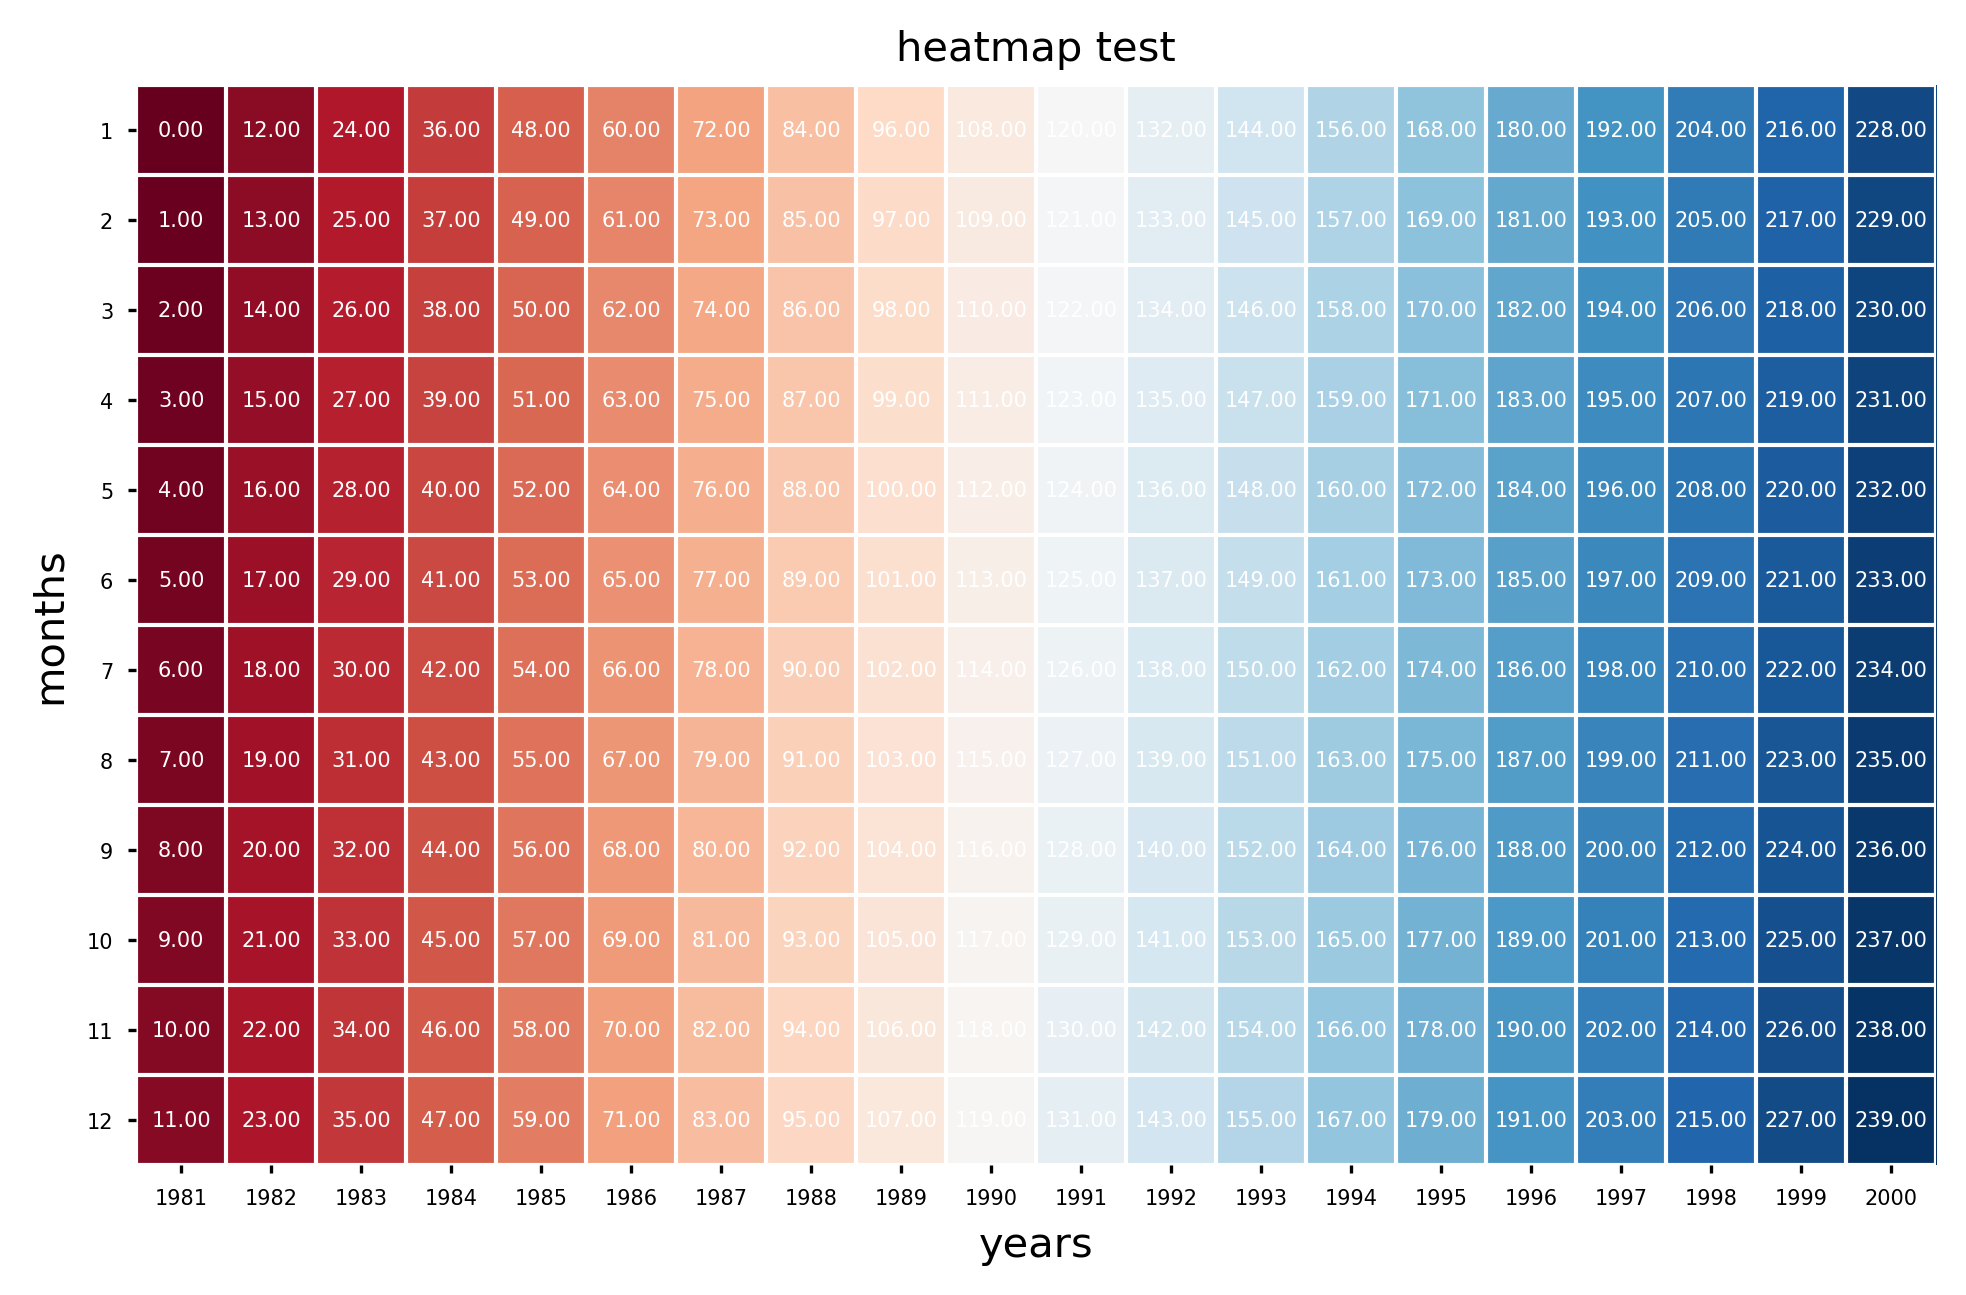

In [12]:
if __name__=="__main__":
    a = np.arange(240)
    heatmap(a, "heatmap test")